# Explore Exercise
Codeup's regression exercise to accompany the lesson:    
*explore.ipynb*    


## Purpose
Your goal is to predict the values of single unit properties using the observations from 2017.

### Goal/Aim

 - Your goal is to predict the values of single unit properties using the observations from 2017.
 - Find which features variable pairs impact values
 - Find which categorical and continuous variables impact value
 - Build a `explore.py` file for functions and visualizations
 
## Hypothesis
- Ho1: Bedrooms are not positively related to Value 
- Ha1: Bedrooms are positively related to Value

- H02: Bathrooms are not ""
- Ha2: Bathrooms are positively ''

- Ho3: Square_feet is not ''
- Ha3: square_feet is positively ''

- Ho4: Garage

- Ho5: House age is not related to value
- Ha5: House age is negatively related to value

## Methodology
Following course lesson example
 - May want to look at univariate, bivariate, and multivariate analysis

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1: Univariate
- todo 2: Bivariate
- todo 3: Multivariate 

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [43]:
# Data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations, product, permutations



# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

#Modeling
from sklearn.model_selection import train_test_split

# Visualizations


## Local library import
We import all the required local libraries libraries

In [2]:
# Include local libraries
import env
import wrangle
import explore

# Warnings
# warnings ignore
import warnings
warnings.filterwarnings("ignore")



# Data import
Zillow data from wrangle file

In [3]:
df=wrangle.wrangle_zillow()

Using cached csv


In [4]:
df.head()

,bedrooms,bathrooms,square_feet,garage,pool,lot_size,zip,year_built,tax_value,tax_amount,fed_code,age
parcel,,,,,,,,,,,,
14297519,4,3,3100,2,0,4506,96978,1998,1023282,11013.72,6059,19
17052889,2,1,1465,1,0,12647,97099,1967,464000,5672.48,6111,50
14186244,3,2,1243,2,1,8432,97078,1962,564778,6488.30,6059,55
12177905,4,3,2376,0,1,13038,96330,1970,145143,1777.51,6037,47
12095076,4,3,2962,0,1,63000,96293,1950,773303,9516.26,6037,67


In [5]:
# Dropped taxed amount 
df = df.drop(columns = ['tax_amount'])
df

,bedrooms,bathrooms,square_feet,garage,pool,lot_size,zip,year_built,tax_value,fed_code,age
parcel,,,,,,,,,,,
14297519,4,3,3100,2,0,4506,96978,1998,1023282,6059,19
17052889,2,1,1465,1,0,12647,97099,1967,464000,6111,50
14186244,3,2,1243,2,1,8432,97078,1962,564778,6059,55
12177905,4,3,2376,0,1,13038,96330,1970,145143,6037,47
12095076,4,3,2962,0,1,63000,96293,1950,773303,6037,67
...,...,...,...,...,...,...,...,...,...,...,...
11000655,2,2,1286,0,0,47405,96284,1940,354621,6037,77
17239384,4,2,1612,2,0,12105,97116,1964,67205,6111,53
12773139,3,1,1032,0,0,5074,96480,1954,49546,6037,63


# Data processing
Put here the core of the notebook. Feel free di further split this section into subsections.

### Split the data Here!
<hr style="height:2px;border-width:0;color:black;background-color:black">

In [6]:
# split - Need to add to .py file
def train_validate_test_split(df, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed)
    
    print(f'train --> {train.shape}')
    print(f'validate --> {validate.shape}')
    print(f'test --> {test.shape}')
    
    return train, validate, test

In [7]:
train, validate, test = train_validate_test_split(df, seed=123)

train --> (28266, 11)
validate --> (12115, 11)
test --> (10096, 11)


# Exploritory Data Analysis

- Hypothesize
- Visualize
    - Plot out the distributions of each feature
        - Why?
    - Plot out the interaction of two or more variables?
        - Why?
    - Plot out how subgroups compare to each-other and to the overall population?
        - Why?
    - Document takeaways
        - Why?
    - Identify features that correlate with each other
        - Why?
- Test Hypotheses
***
## Univariate Analysis
- Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.
- Descriptive statistics describe and summarize data. Univariate descriptive statistics describe individual variables.
Describe which variables will be used
Describe what is expected why this may be important

Factors to consider
   - Grouped Data (Bins or categories)
   - Frequency
   - Cumulative data Column
   - Percentage distirbution

Visualization 
 - Bar
 - Histogram
 - Frequency 
 - Pie

After results describe what this tells you
<hr style="height:2px;border-width:0;color:black;background-color:black">

In [8]:
df.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'garage', 'pool', 'lot_size',
       'zip', 'year_built', 'tax_value', 'fed_code', 'age'],
      dtype='object')

In [38]:
categoricals = ['bedrooms', 'bathrooms','garage', 'pool','zip','fed_code']
numerics = ['square_feet','lot_size','year_built', 'tax_value','age']
columns = ['bedrooms', 'bathrooms', 'garage','square_feet', 'tax_value', 'age']
features_to_plot = ['bedrooms', 'bathrooms', 'garage','square_feet', 'tax_value', 'age']

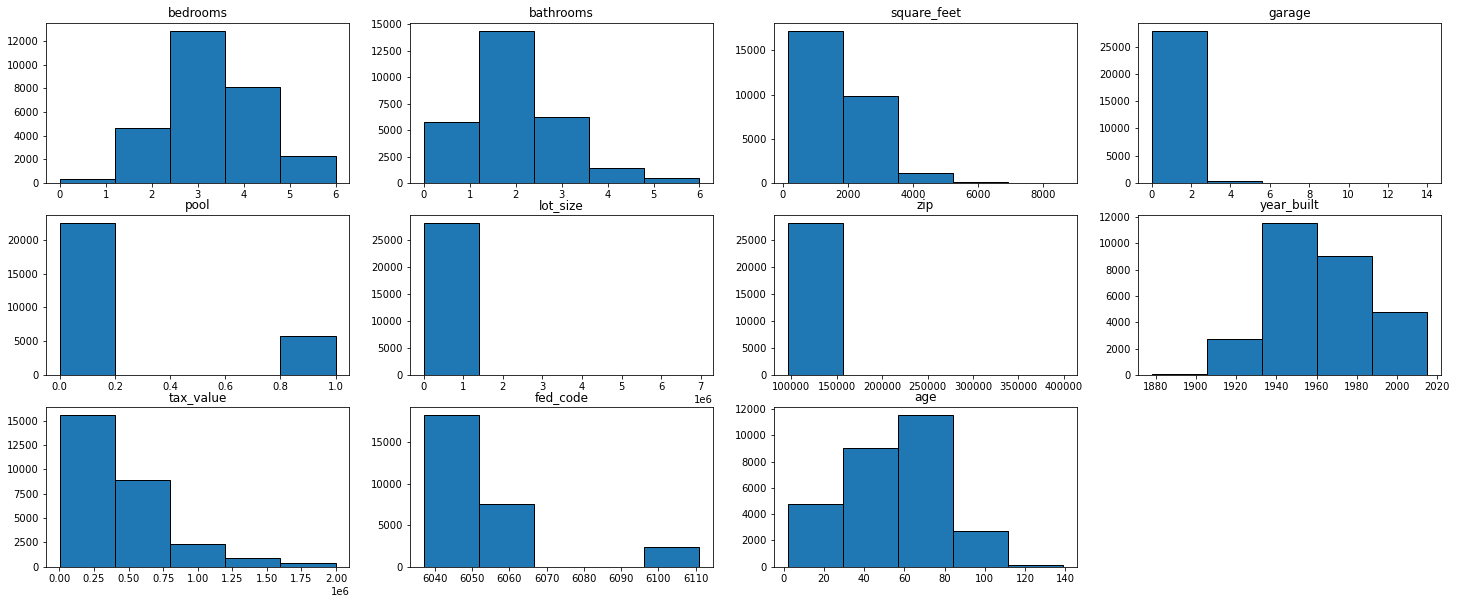

In [16]:
plt.figure(figsize=(25, 10))

for i, col in enumerate(train.columns):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1
    
    # Create subplot.
    # plt.subplot(row X col, where?)
    plt.subplot(3,4,plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    train[col].hist(bins=5, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)

In [ ]:
# Going into explore.py file
# def plot_histograms(df, columns):
#     """ Plots multiple histograms of specified columns argument using data from input df """
#     # List of columns
#     cols = columns
#     plt.figure(figsize=(16, 6))
#     for i, col in enumerate(cols):

#         # i starts at 0, but plot nos should start at 1
#         plot_number = i + 1 

#         # Create subplot.
#         plt.subplot(1, len(cols), plot_number)

#         # Title with column name.
#         plt.title(col)

#         # Display boxplot for column.
#         sns.histplot(data=df[col], bins=10)

#         # Hide gridlines.
#         plt.grid(False)

#     plt.show()

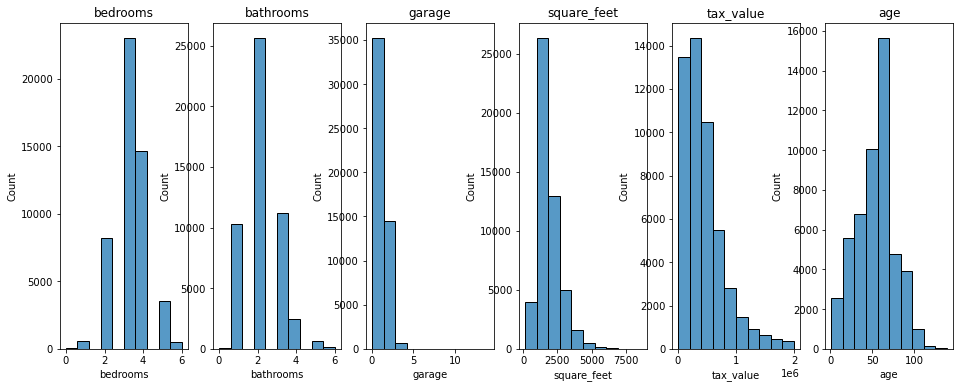

In [17]:
explore.plot_histograms(df, features_to_plot)

### Take away
- Not sure at this point

## Bivariate analysis
- Bivariate analysis means the analysis of the bivariate data. This is a single statistical analysis that is used to find out the relationship that exists between two value sets. The variables that are involved are X and Y.

Describe which variables will be used <br>
Describe what is expected why this may be important

Use:
- Scatter plots – This gives an idea of the patterns that can be formed using the two variables
- Regression Analysis – This uses a wide range of tools to determine how the data post could be related. The post may follow an exponential curve. The regression analysis gives the equation for a line or curve. It also helps to find the correlation coefficient.
- Correlation Coefficients – The coefficient lets you know if the data in question are related. When the correlation coefficient is zero then this means that the variables are not related. If the correlation coefficient is a positive or a negative 1 then this means that the variables are perfectly correlated.

Factors to consider


Tests for comparison

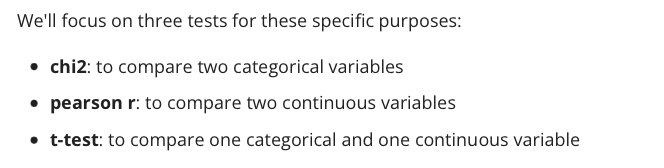

After results describe what this tells you
<hr style="height:2px;border-width:0;color:black;background-color:black">

In [18]:
# In Explore.py file
#def plot_categorical_and_continuous_vars(df, categorical, continuous, sample_amt):
#     """ Accepts dataframe and lists of categorical and continuous variables and outputs plots to visualize the variables"""
#     # Sampling allows for faster plotting with large datasets at the expense of not seeing all datapoints
#     if sample_amt:
#         df = df.sample(sample_amt)
        
#     for num in continuous:
#         for cat in categorical:
#             _, ax = plt.subplots(1,3,figsize=(20,8))
#             print(f'Generating plots {num} by {cat}')
#             p = sns.swarmplot(data = df, x=cat, y=num, ax=ax[0])
#             p.axhline(df[num].mean())
#             p = sns.boxplot(data = df, x=cat, y = num, ax=ax[1])
#             p.axhline(df[num].mean())
#             p = sns.violinplot(data = df, x=cat, y=num, hue = cat, ax=ax[2])
#             p.axhline(df[num].mean())
#             plt.suptitle(f'{num} by {cat}', fontsize = 18)
#             plt.show()

Generating plots tax_value by bedrooms


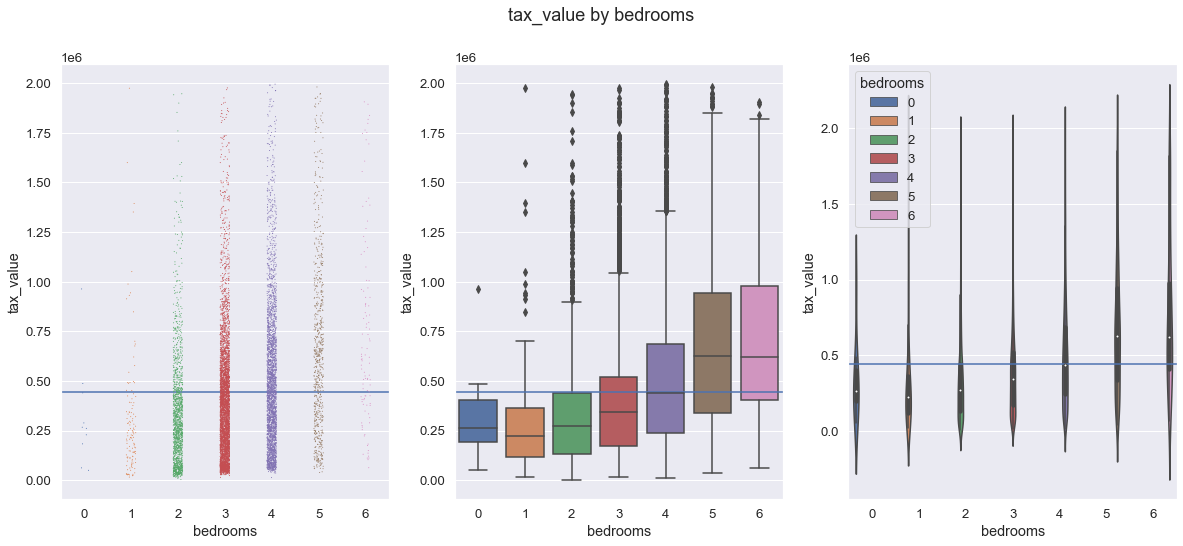

Generating plots tax_value by bathrooms


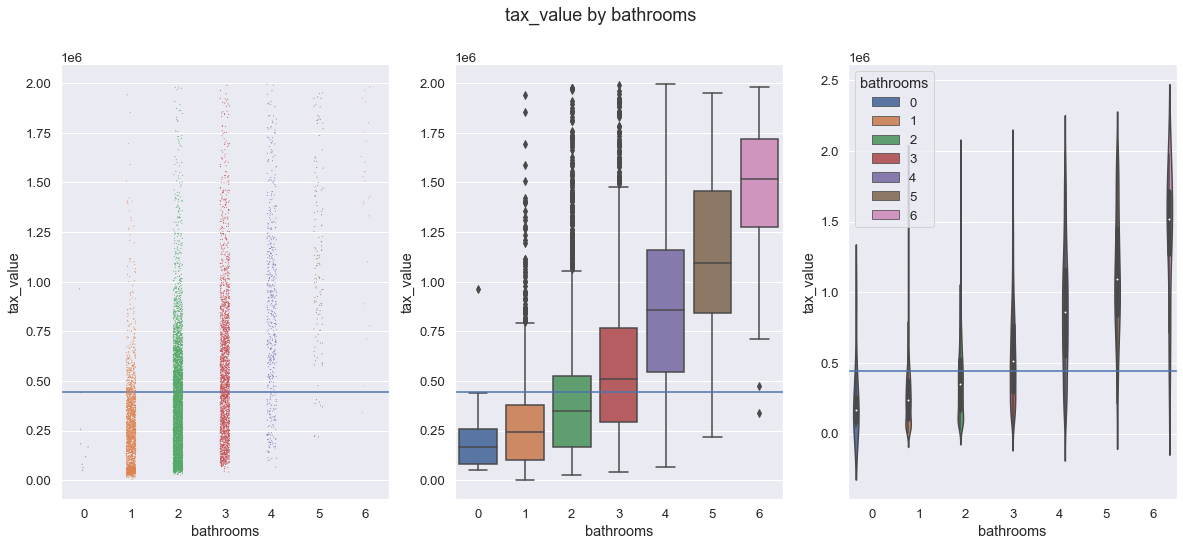

Generating plots tax_value by garage


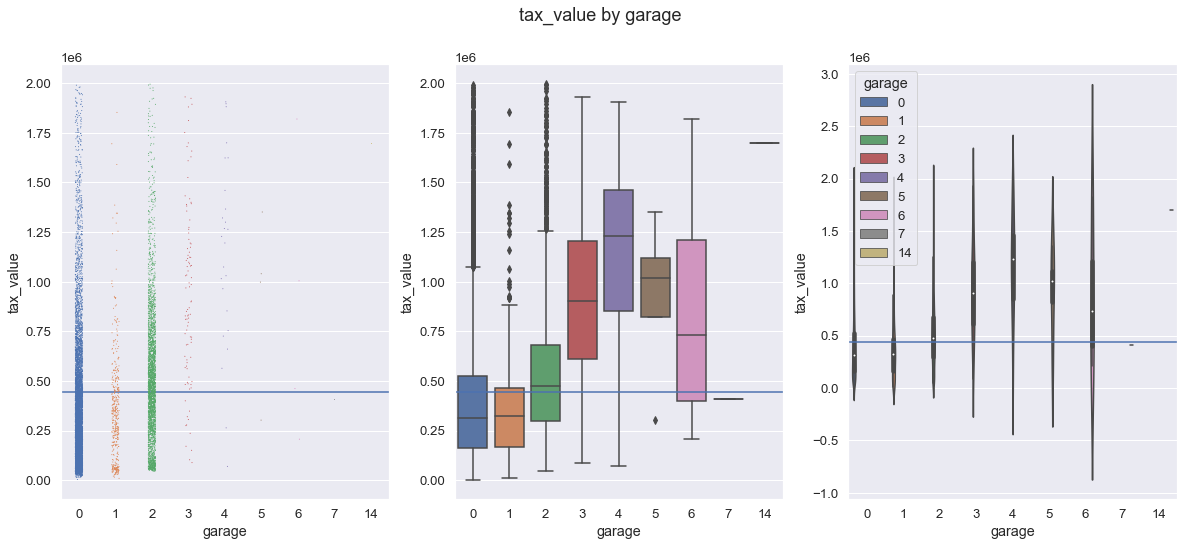

Generating plots tax_value by pool


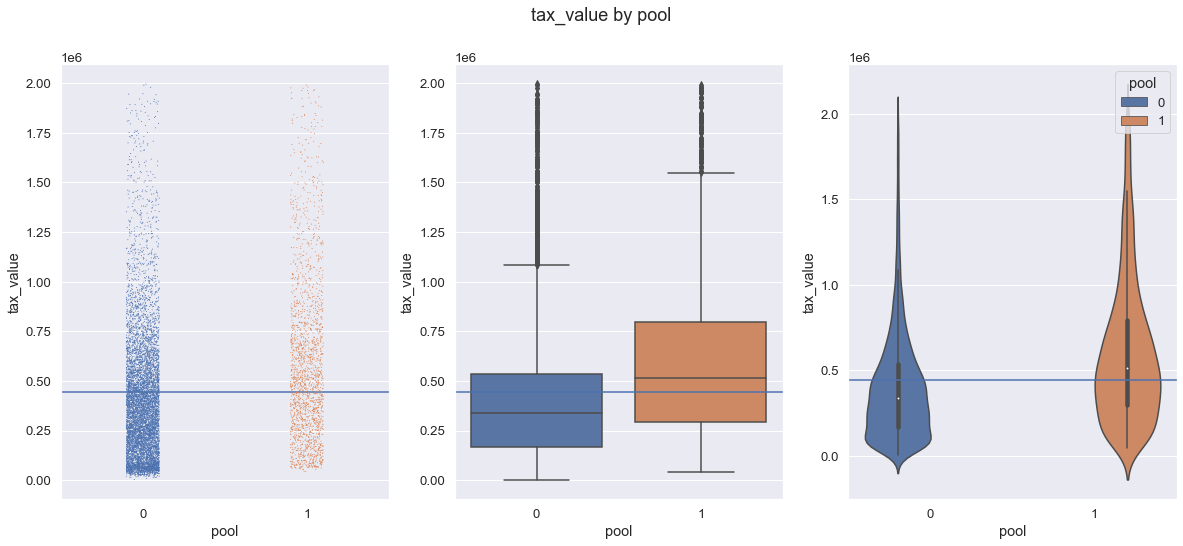

Generating plots tax_value by zip


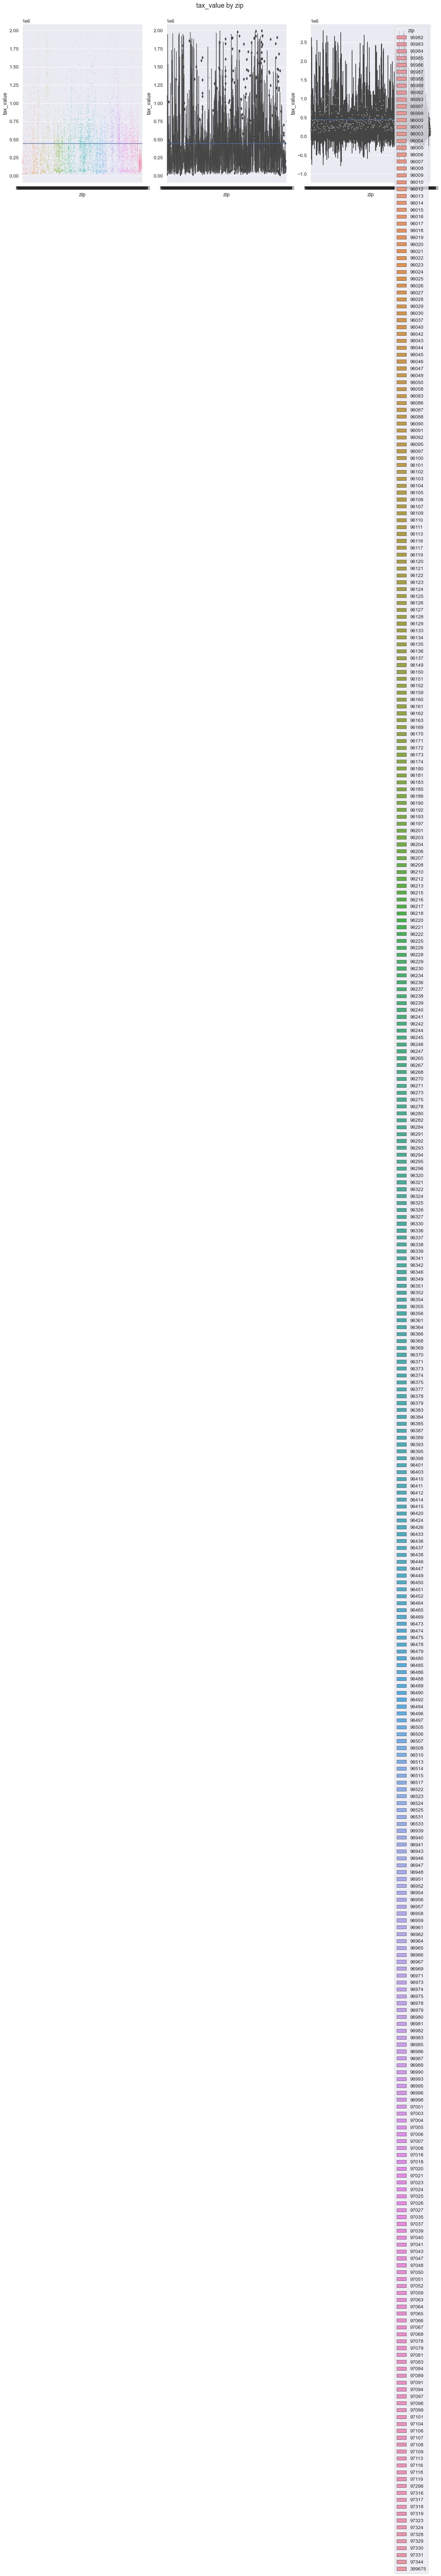

In [19]:
explore.plot_categorical_and_continuous_vars(train,['bedrooms', 'bathrooms','garage', 'pool','zip'],
                                             ['tax_value'], sample_amt = 10000)

In [ ]:
# in explore.py file
# def plot_variable_pairs(df, numerics, categoricals, targets, sample_amt):
#     """ Plots pairwise relationships between numeric variables in df along with regression line for each pair. Uses categoricals for hue."""
#     # Sampling allows for faster plotting with large datasets at the expense of not seeing all datapoints
#     # Checks if a sample amount was inputted
#     if sample_amt:
#         df = df.sample(sample_amt)
#     # Checks if any categorical variables were given to determine how to set the lmplot regression line parameters
#     if len(categoricals)==0:
#         categoricals = [None]
#         # Setting to red makes it easier to see against the default color
#         line_kws = {'lw':4, 'color':'red'}
#     else:
#         line_kws = {'lw':4}
#     for cat in categoricals:    
#         for col in numerics:
#             for y in targets:
#                 if y == col:
#                     continue
#                 sns.lmplot(data = df, 
#                            x=col, 
#                            y=y, 
#                            hue=cat, 
#                            palette='Set1',
#                            scatter_kws={"alpha":0.2, 's':10}, 
#                            line_kws=line_kws,
#                            ci = None)
            


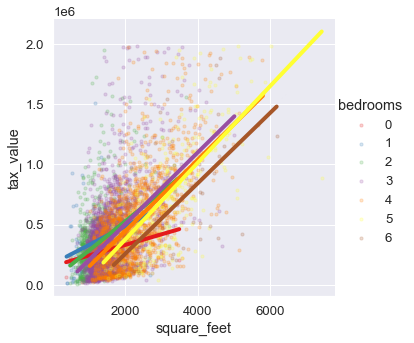

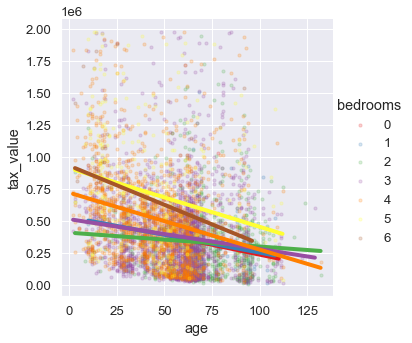

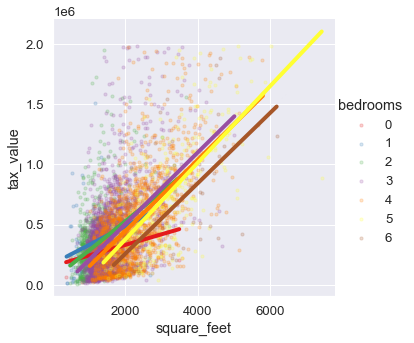

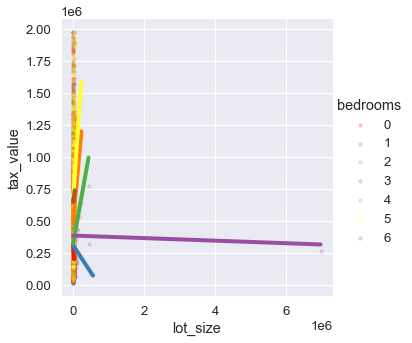

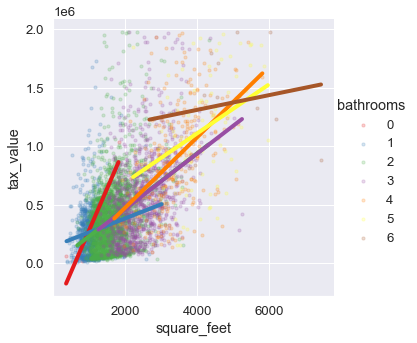

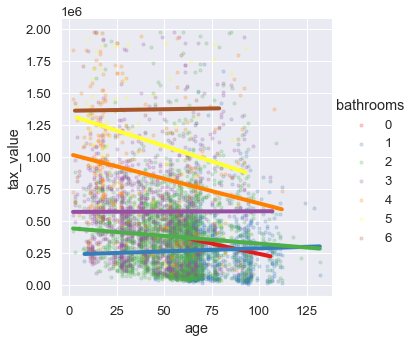

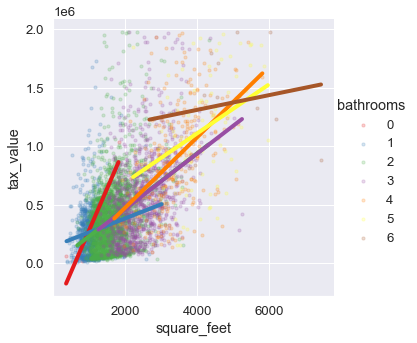

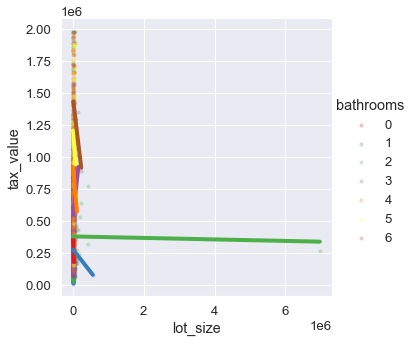

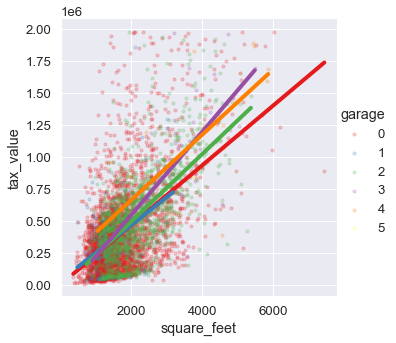

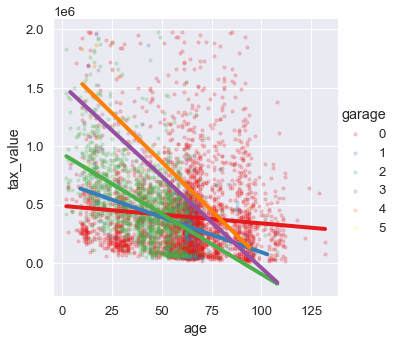

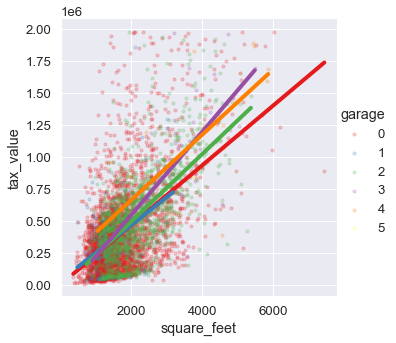

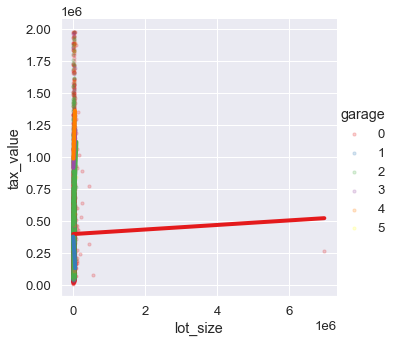

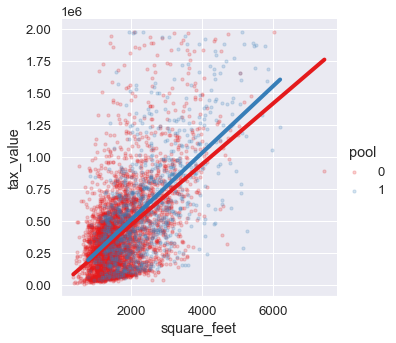

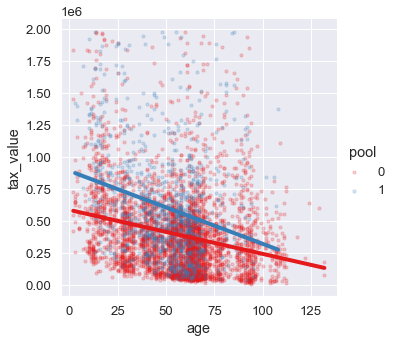

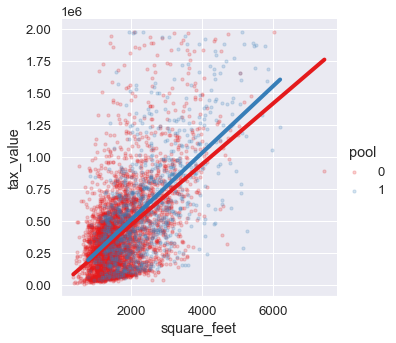

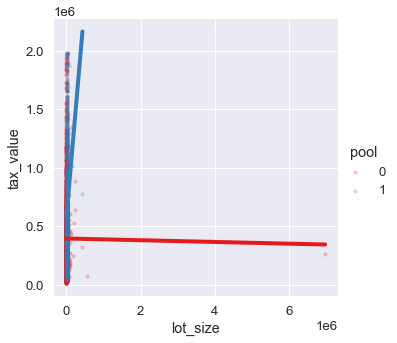

In [21]:
explore.plot_variable_pairs(train, ['square_feet','age','square_feet','lot_size'], categoricals = ['bedrooms','bathrooms','garage','pool'], targets=['tax_value'], sample_amt=5000)


### Take aways
- Not all graphs are useful
- # bedrooms have a good correlation to value
- # Bathrooms may have negative correlation
- sq_ft is positively correlated to value, especially with Garage/ pool

## Multivariate Analysis


- Regression analysis: Used to determine the relationship between a dependent variable and one or more independent variable.
- Analysis of Variance (ANOVA): Used to determine the relationship between collections of data by analyzing the difference in the means.
- Interdependent analysis: Used to determine the relationship between a set of variables among themselves.
- Discriminant analysis: Used to classify observations in two or more distinct set of categories.
- Classification and cluster analysis: Used to find similarity in a group of observations.
- Principal component analysis: Used to interpret data in its simplest form by introducing new uncorrelated variables.
- Factor analysis: Similar to principal component analysis, this too is used to crunch big data into small, interpretable forms.
- Canonical correlation analysis: Perhaps one of the most complex models among all of the above, canonical correlation attempts to interpret data by analyzing relationships between cross-covariance matrices.

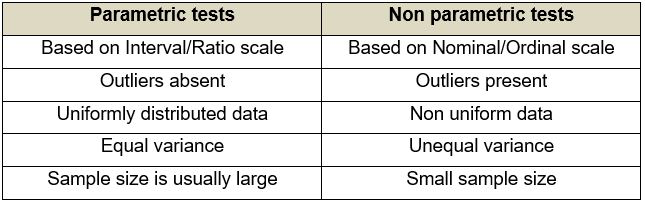
https://static.s4be.cochrane.org/app/uploads/2021/09/multivariate-blog.jpg
<hr style="height:2px;border-width:0;color:black;background-color:black">

In [24]:
chi2, p, degf, expected = stats.chi2_contingency(train)

print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

---
Expected
[[2.99557559e+00 1.98446585e+00 1.68371019e+03 ... 4.04941239e+05
  5.54581432e+03 4.97565306e+01]
 [1.74307138e+00 1.15472487e+00 9.79720579e+02 ... 2.35627999e+05
  3.22700928e+03 2.89524273e+01]
 [4.30457913e+00 2.85163569e+00 2.41945614e+03 ... 5.81892045e+05
  7.96921856e+03 7.14990882e+01]
 ...
 [1.81563820e+00 1.20279789e+00 1.02050790e+03 ... 2.45437567e+05
  3.36135479e+03 3.01577627e+01]
 [2.66899857e+00 1.76811980e+00 1.50015246e+03 ... 3.60794630e+05
  4.94121081e+03 4.43320841e+01]
 [2.20266127e+00 1.45918737e+00 1.23804028e+03 ... 2.97755258e+05
  4.07786418e+03 3.65862184e+01]]
---

chi^2 = 3983188692.4166
p     = 0.0000


In [26]:
results = pd.DataFrame(columns=['Features','Chi2Weights'])

for i in range (len(train.columns)):
    chi2, p = stats.chisquare(train[train.columns[i]])
    results = results.append([pd.Series([train.columns[i], chi2], index=results.columns)], ignore_index = True)

In [27]:
results = results.sort_values(by = "Chi2Weights", ascending = False)
results.head(20)

,Features,Chi2Weights
5,lot_size,20357424726.086704
8,tax_value,7917256710.821899
2,square_feet,10301909.141503
6,zip,4805149.698544
10,age,267533.519144
3,garage,39210.385406
4,pool,22565.0
1,bathrooms,10017.824856
7,year_built,7397.724813
0,bedrooms,6962.599363


In [29]:
chi_df = train[results["Features"].head(20)]
chi_df.head()

,lot_size,tax_value,square_feet,zip,age,garage,pool,bathrooms,year_built,bedrooms,fed_code
parcel,,,,,,,,,,,
11038754,7946,398737,1217,96371,65,0,0,2,1952,2,6037
13868645,8132,183434,1427,97039,54,2,0,2,1963,3,6059
17278308,15269,612977,3472,96351,24,2,0,3,1993,4,6111
12852432,6652,241917,1400,96492,43,0,0,2,1974,3,6037
10729644,7674,67256,1167,96342,58,0,1,2,1959,3,6037


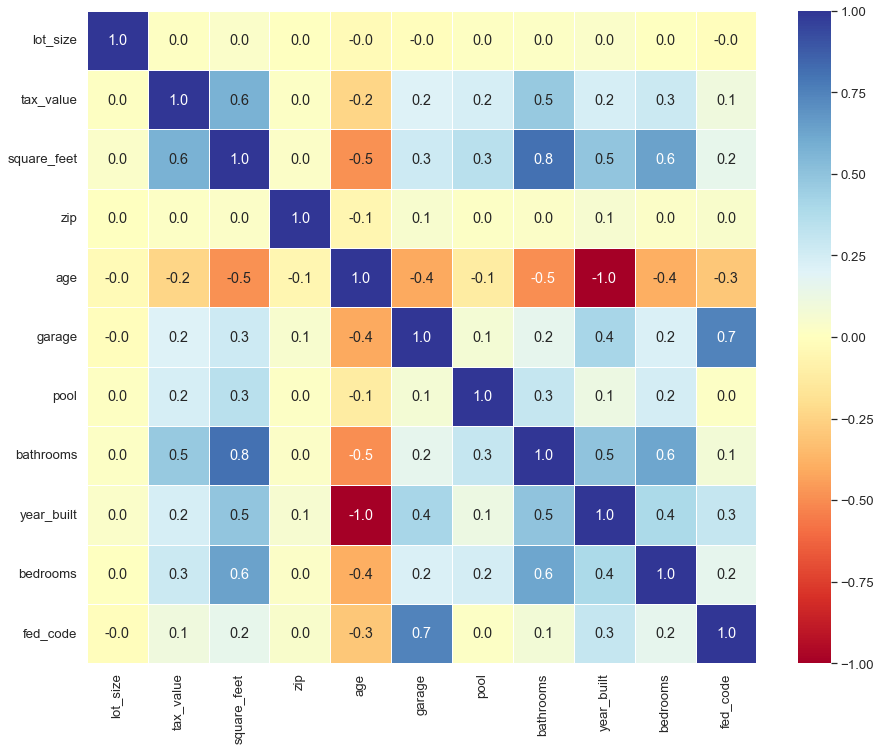

In [35]:
# Finding Correlation
plt.figure(figsize = (15, 12))
sns.heatmap(chi_df.corr(), cmap="RdYlBu", annot=True, linewidth=0.5, fmt=".1f")
plt.show()

# Takeaway
- Negative corrlation between age and sq_ft
- Sq_ft and bathrooms have highest postive correlation
- age is negative correlation with everythin
- Location and garage# have high correlation

## Validation check
- [x]As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

- [x]Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

- [x]Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

- [x]Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

- [x]save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

- [x]Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

- [x]Come up with some initial hypotheses based on your goal of predicting property value.

- [x]Visualize all combinations of variables in some way.

- [ ]Run the appropriate statistical tests where needed.

- [x]What independent variables are correlated with the dependent variable, home value?

- [x]Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

 - [ ]Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

- [x]Explore your dataset with any other visualizations you think will be helpful.

### Statistical testing - Hypothesis testing on columns relationships

In [47]:
# Function to loop through the columns and return chi2 and corrs to
# confirm or reject null hypothesis (relationship between variables)
def stats_result(p,null_h,**kwargs):
    """
    Compares p value to alpha and outputs whether or not the null hypothesis
    is rejected or if it failed to be rejected.
    DOES NOT HANDLE 1-TAILED T TESTS
    
    Required inputs:  p, null_h (str)
    Optional inputs: alpha (default = .05), chi2, r, t, corr
    
    """
    #Get alpha value - Default to .05 if not provided
    alpha=kwargs.get('alpha',.05)
    #get any additional statistical values passed (for printing)
    t=kwargs.get('t',None)
    r=kwargs.get('r',None)
    chi2=kwargs.get('chi2',None)
    corr=kwargs.get('corr',None)
    
    #Print null hypothesis
    print(f'\n\033[1mH\u2080:\033[0m {null_h}')
    #Test p value and print result
    if p < alpha: print(f"\033[1mWe reject the null hypothesis\033[0m, p = {p} | α = {alpha}")
    else: print(f"We failed to reject the null hypothesis, p = {p} | α = {alpha}")
    #Print any additional values for reference
    if 't' in kwargs: print(f'  t: {t}')
    if 'r' in kwargs: print(f'  r: {r}')
    if 'chi2' in kwargs: print(f'  chi2: {chi2}')
    if 'corr' in kwargs: print(f'  corr: {corr}')

    return None

In [51]:
#Look at numeric features vs target
combos = combinations(['square_feet','lot_size','year_built', 'tax_value','age'],2)
for pair in combos:
    h0 = f'There is no linear correlation between {pair[0]}  and {pair[1]} of a property'
    corr, p = stats.pearsonr(train[pair[0]],train[pair[1]])
    #use default alpha of .05
    stats_result(p,h0,corr=corr)


H₀: There is no linear correlation between square_feet  and lot_size of a property
We reject the null hypothesis, p = 4.9303980322492716e-08 | α = 0.05
  corr: 0.032431884080385026

H₀: There is no linear correlation between square_feet  and year_built of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.4890726710042897

H₀: There is no linear correlation between square_feet  and tax_value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.5713617045637585

H₀: There is no linear correlation between square_feet  and age of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: -0.48907267100428936

H₀: There is no linear correlation between lot_size  and year_built of a property
We reject the null hypothesis, p = 1.2164231246409506e-07 | α = 0.05
  corr: 0.03146430391477997

H₀: There is no linear correlation between lot_size  and tax_value of a property
We failed to reject the null hypothesis, p = 0.14218052014843363 | α = 0.

In [50]:
# Second set: Look at of categorical vs target
combos = combinations(['bedrooms', 'bathrooms','garage', 'pool','zip','fed_code','tax_value'],2)
for pair in combos:
    h0 = f'There is no linear correlation between {pair[0]}  and {pair[1]} of a property'
    corr, p = stats.pearsonr(train[pair[0]],train[pair[1]])
    #use default alpha of .05
    stats_result(p,h0,corr=corr)


H₀: There is no linear correlation between bedrooms  and bathrooms of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.6232903931998286

H₀: There is no linear correlation between bedrooms  and garage of a property
We reject the null hypothesis, p = 4.589118078999483e-309 | α = 0.05
  corr: 0.2207696704458505

H₀: There is no linear correlation between bedrooms  and pool of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.2488564245458289

H₀: There is no linear correlation between bedrooms  and zip of a property
We reject the null hypothesis, p = 1.8190850701845644e-05 | α = 0.05
  corr: 0.0254900055142545

H₀: There is no linear correlation between bedrooms  and fed_code of a property
We reject the null hypothesis, p = 4.64312604892584e-159 | α = 0.05
  corr: 0.1588261648582359

H₀: There is no linear correlation between bedrooms  and tax_value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.275791816080009

H₀: T